# Лабораторная работа 8

Кластеризация

Выполнил: Новицкий Никита (6132-010402D)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm.notebook import tqdm

Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

Набор данных: https://www.kaggle.com/datasets/deepu1109/star-dataset 

# Информация о наборе данных:

Это набор данных, состоящий из нескольких характеристик звезд.

Некоторые из них являются:

Абсолютная температура (в К)

Относительная яркость (L/Lo)

Относительный радиус (R/Ro)

Абсолютная величина (Мв)

Цвет звезды (белый, красный, Синий, желтый, желто-оранжевый и т.д.)

Спектральный класс (O, B, A, F, G, K,,M)

Тип Звезды ** (Красный Карлик, Коричневый Карлик, Белый Карлик, Главная последовательность, Сверхгиганты, Гипергиганты)**

Lo = 3,828 x 10^26 Вт (Средняя яркость Солнца)

Ro = 6,9551 x 10^8 м (Средний радиус Солнца)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
215,32460,173800.0000,6.237,-4.360,3,Blue,O
47,3574,200000.0000,89.000,-5.240,4,Red,M
199,3463,0.0027,0.675,14.776,1,Red,M
223,23440,537430.0000,81.000,-5.975,4,Blue,O
150,29560,188000.0000,6.020,-4.010,3,Blue-white,B


In [4]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
df["Star color"], _ = pd.factorize(df["Star color"])
df["Spectral Class"], _ = pd.factorize(df["Spectral Class"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


Выполните иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), постройте график-дендрограмму (hierarchy.dendrogram)

In [7]:
X, y = df.drop("Star type", axis=1), df["Star type"]

In [8]:
hierarchy = linkage(X, metric="euclidean")

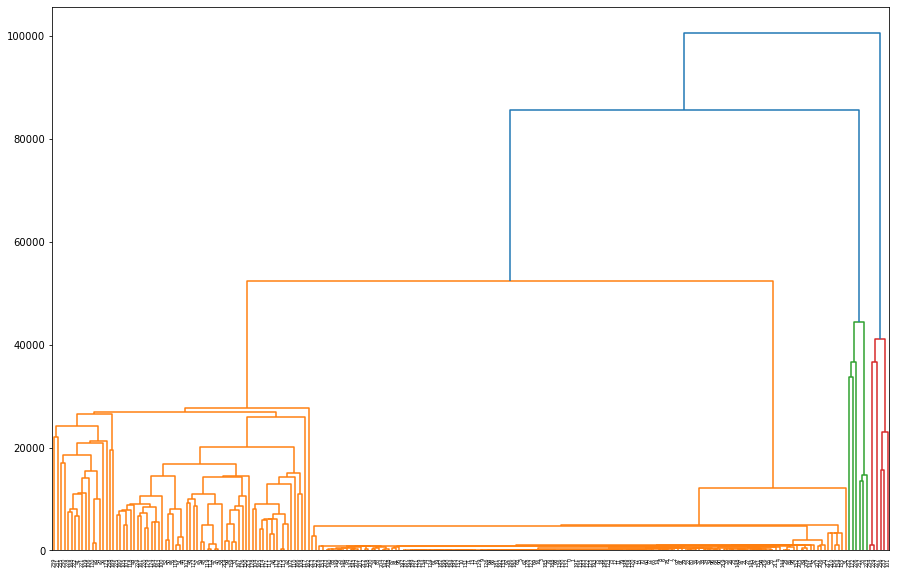

In [9]:
plt.figure(figsize=(15, 10))
dendrogram(hierarchy, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.show()

На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [10]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

def show_metrics(X, y, algorithm):
    metrics={
        "ARI": adjusted_rand_score(y, algorithm.labels_),
        "AMI": adjusted_mutual_info_score(y, algorithm.labels_),
        "Homogenity": homogeneity_score(y, algorithm.labels_),
        "Completeness": completeness_score(y, algorithm.labels_),
        "V-measure": v_measure_score(y, algorithm.labels_),
        "Silhouette": silhouette_score(X, algorithm.labels_)
    }
    return metrics

In [11]:
KMeansAlgo = KMeans()
clusters = KMeansAlgo.fit_predict(X)
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([154,  22,   6,   5,   6,  19,  12,  16]))

In [12]:
show_metrics(X, y, KMeansAlgo)

{'ARI': 0.17441259363060022,
 'AMI': 0.3697502877249094,
 'Homogenity': 0.3486974897845918,
 'Completeness': 0.4806219508512911,
 'V-measure': 0.4041667410297709,
 'Silhouette': 0.7931628200479666}

Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

In [13]:
parametrs = {
    "n_clusters": range(2, 10), 
    "max_iter": range(100, 500, 50), 
    "tol": [0.0001, 0.001, 0.01]
}

In [14]:
GridKMeansAlgo = GridSearchCV(
    KMeans(), 
    parametrs, 
    scoring="v_measure_score", 
    cv=5
)

In [15]:
GridKMeansAlgo.fit(X, y)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'max_iter': range(100, 500, 50),
                         'n_clusters': range(2, 10),
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='v_measure_score')

In [16]:
print(f"Лучшие параметры для Tuned KMeans: {GridKMeansAlgo.best_params_}")

Лучшие параметры для Tuned KMeans: {'max_iter': 150, 'n_clusters': 9, 'tol': 0.0001}


In [17]:
np.unique(GridKMeansAlgo.best_estimator_.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([154,  12,   6,  22,   4,  16,   5,   2,  19]))

In [18]:
show_metrics(X, y, GridKMeansAlgo.best_estimator_)

{'ARI': 0.17407123602885446,
 'AMI': 0.36652567773581524,
 'Homogenity': 0.35113107602924354,
 'Completeness': 0.47812345437460674,
 'V-measure': 0.40490343279189417,
 'Silhouette': 0.7892252718090891}

Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [19]:
scores = list()

for cluster in tqdm(range(2, 50)):
    clusters = KMeans(n_clusters=cluster, max_iter=150, tol=0.0001).fit_predict(X)
    scores.append(silhouette_score(X, clusters))

  0%|          | 0/48 [00:00<?, ?it/s]

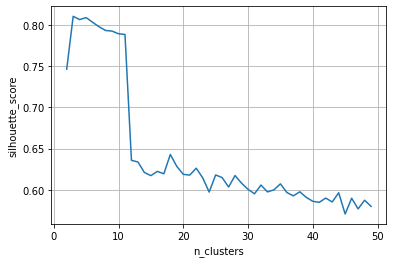

In [20]:
plt.plot(range(2, 50), scores)
plt.xlabel("n_clusters")
plt.ylabel("silhouette_score")
plt.grid(True)
plt.show()